<a href="https://colab.research.google.com/github/Vipul251/MLProject/blob/main/Makerble_Employee_Survey_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
from google.colab import files
uploaded = files.upload()

# Assuming the file is in CSV format
df = pd.read_csv('/content/employee_experience_survey_data.csv')


Saving employee_experience_survey_data.csv to employee_experience_survey_data (2).csv


In [ ]:
# Check for missing values
print(df.isnull().sum())




Name                                0
Age Bracket                         0
Gender                              0
Ethnicity                           0
Job Title                           0
Department                          0
Date Survey Completed               0
Job Satisfaction                    0
Work-Life Balance                   0
Management Support                  0
Team Collaboration                  0
Workload Fairness                   0
Career Development Opportunities    0
Workplace Inclusivity               0
Company Communication               0
Compensation Satisfaction           0
Job Security                        0
Overall Engagement                  0
dtype: int64


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values as necessary
df.dropna(inplace=True)  # Drop rows with missing values, or use fillna() if you prefer.


Name                                0
Age Bracket                         0
Gender                              0
Ethnicity                           0
Job Title                           0
Department                          0
Date Survey Completed               0
Job Satisfaction                    0
Work-Life Balance                   0
Management Support                  0
Team Collaboration                  0
Workload Fairness                   0
Career Development Opportunities    0
Workplace Inclusivity               0
Company Communication               0
Compensation Satisfaction           0
Job Security                        0
Overall Engagement                  0
dtype: int64


In [ ]:
print(df[['Overall Engagement', 'Job Satisfaction']].isnull().sum())
df.dropna(subset=['Overall Engagement', 'Job Satisfaction'], inplace=True)
df['Overall Engagement'].fillna(df['Overall Engagement'].median(), inplace=True)
df['Job Satisfaction'].fillna(df['Job Satisfaction'].median(), inplace=True)


Overall Engagement    0
Job Satisfaction      0
dtype: int64


<ipython-input-73-576b485c26d7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Overall Engagement'].fillna(df['Overall Engagement'].median(), inplace=True)
<ipython-input-73-576b485c26d7>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
likert_mapping = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neutral': 3,
    'Agree': 4,
    'Strongly Agree': 5
}
for column in ['Job Satisfaction', 'Work-Life Balance', 'Management Support', 'Team Collaboration',
               'Workload Fairness', 'Career Development Opportunities', 'Workplace Inclusivity',
               'Company Communication', 'Compensation Satisfaction', 'Job Security', 'Overall Engagement']:
    df[column] = df[column].map(likert_mapping)


In [ ]:
print(df['Overall Engagement'].unique())
print(df['Job Satisfaction'].unique())


[]
[]


In [ ]:
overall_engagement_mean = df['Overall Engagement'].mean()
job_satisfaction_median = df['Job Satisfaction'].median()
job_satisfaction_mode = df['Job Satisfaction'].mode()
overall_engagement_std = df['Overall Engagement'].std()

print(f"Mean Overall Engagement: {overall_engagement_mean}")
print(f"Median Job Satisfaction: {job_satisfaction_median}")
print(f"Mode of Job Satisfaction: {job_satisfaction_mode[0] if not job_satisfaction_mode.empty else 'No mode'}")
print(f"Standard Deviation of Overall Engagement: {overall_engagement_std}")



Mean Overall Engagement: nan
Median Job Satisfaction: nan
Mode of Job Satisfaction: No mode
Standard Deviation of Overall Engagement: nan


In [ ]:
# Example: Average Job Satisfaction by Department
avg_job_satisfaction_by_dept = df.groupby('Department')['Job Satisfaction'].mean()
print(avg_job_satisfaction_by_dept)


Series([], Name: Job Satisfaction, dtype: float64)


In [ ]:
# Example: Job Satisfaction by Gender
job_satisfaction_by_gender = df.groupby('Gender')['Job Satisfaction'].mean()
print(job_satisfaction_by_gender)


Series([], Name: Job Satisfaction, dtype: float64)


In [ ]:
from scipy.stats import ttest_ind

it_satisfaction = df[df['Department'] == 'IT']['Job Satisfaction']
hr_satisfaction = df[df['Department'] == 'HR']['Job Satisfaction']

t_stat, p_value = ttest_ind(it_satisfaction, hr_satisfaction)
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: nan, P-value: nan


In [ ]:
correlation = df['Work-Life Balance'].corr(df['Overall Engagement'])
print(f"Correlation coefficient: {correlation}")


Correlation coefficient: -0.361040820409166


In [ ]:
df.groupby('Department')['Job Satisfaction'].mean()


,Job Satisfaction
Department,


In [ ]:
print(df['Work-Life Balance'].unique())
print(df['Overall Engagement'].unique())


['Strongly Agree' 'Strongly Disagree' 'Agree' 'Neutral' 'Disagree']
[5 3 2 4 1]


In [ ]:
df['Work-Life Balance'].fillna(df['Work-Life Balance'].median(), inplace=True)
df['Overall Engagement'].fillna(df['Overall Engagement'].median(), inplace=True)


<ipython-input-51-ff9a7f53be4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work-Life Balance'].fillna(df['Work-Life Balance'].median(), inplace=True)
<ipython-input-51-ff9a7f53be4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
df['Work-Life Balance'] = df['Work-Life Balance'].map(likert_mapping)
df['Overall Engagement'] = df['Overall Engagement'].map(likert_mapping)


In [ ]:
df.dropna(subset=['Work-Life Balance', 'Overall Engagement'], inplace=True)


In [ ]:
df['Work-Life Balance'] = pd.to_numeric(df['Work-Life Balance'], errors='coerce')
df['Overall Engagement'] = pd.to_numeric(df['Overall Engagement'], errors='coerce')


In [ ]:
correlation = df['Work-Life Balance'].corr(df['Overall Engagement'])
print(f"Correlation coefficient: {correlation}")



Correlation coefficient: nan


In [ ]:
# Ensure columns are numeric
df['Work-Life Balance'] = pd.to_numeric(df['Work-Life Balance'], errors='coerce')
df['Overall Engagement'] = pd.to_numeric(df['Overall Engagement'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df.dropna(subset=['Work-Life Balance', 'Overall Engagement'], inplace=True)

# Check for any remaining NaN values
print(df['Work-Life Balance'].isna().sum())
print(df['Overall Engagement'].isna().sum())

# Calculate correlation
correlation = df['Work-Life Balance'].corr(df['Overall Engagement'])
print(f"Correlation coefficient: {correlation}")



0
0
Correlation coefficient: nan


In [ ]:
# Sample DataFrame for testing
sample_data = {
    'Work-Life Balance': [4, 5, 3, 2, 1, 4, 5],
    'Overall Engagement': [4, 5, 3, 2, 1, 5, 4]
}
sample_df = pd.DataFrame(sample_data)

# Calculate correlation on the sample
correlation = sample_df['Work-Life Balance'].corr(sample_df['Overall Engagement'])
print(f"Sample Correlation coefficient: {correlation}")


Sample Correlation coefficient: 0.9270833333333333


In [ ]:
print("Unique values in Work-Life Balance:")
print(df['Work-Life Balance'].unique())

print("Unique values in Overall Engagement:")
print(df['Overall Engagement'].unique())


Unique values in Work-Life Balance:
[]
Unique values in Overall Engagement:
[]


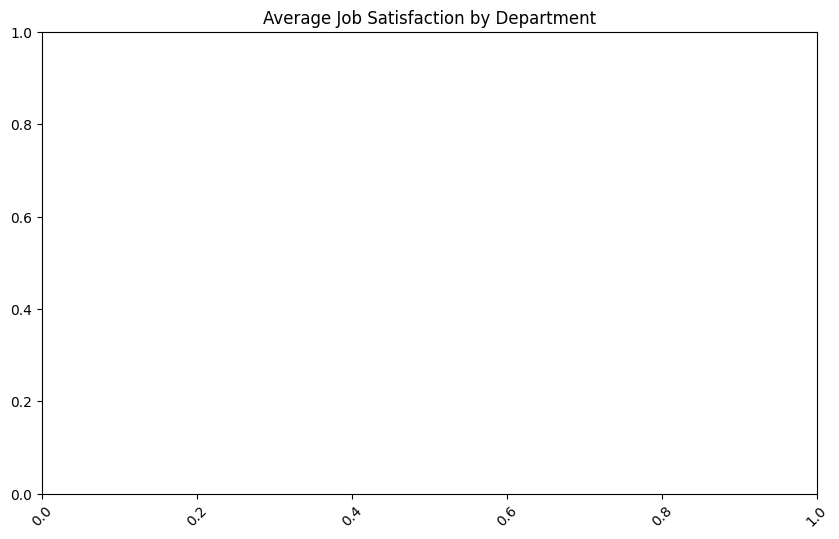

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar chart for average Job Satisfaction by Department
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Job Satisfaction', data=df)
plt.title('Average Job Satisfaction by Department')
plt.xticks(rotation=45)
plt.show()
